#Task: Image compression with K-means

Implement K-Means algorithm and apply it to compress an image "NAORelease.jpg" for various K (see slides for details). As a feature vector use RGB-representation of each pixel from the image. 
<br>
Analyse running time, what could you suggest to improve it? 
Compare your implementation with the existing k-mean algorithm given in python.

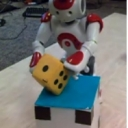

In [1]:
from IPython.display import Image
Image(filename='NAORelease.jpg')

In [2]:
import numpy as np
import random
import Image

In [3]:
class Cluster(object):
    def __init__(self):
        self.pixels = []
        self.centroid = None
        
    def addPoint(self, pixel):
        self.pixels.append(pixel)

    def setNewCentroid(self):
        R = [colour[0] for colour in self.pixels]
        G = [colour[1] for colour in self.pixels]
        B = [colour[2] for colour in self.pixels]

        R = sum(R) / len(R)
        G = sum(G) / len(G)
        B = sum(B) / len(B)

        self.centroid = (R, G, B)
        self.pixels = []

        return self.centroid

In [4]:
class Kmeans(object):

    def __init__(self, K, max_iterations):
        self.K = K
        self.max_iterations = max_iterations

    def run(self, image):
        self.image_size = image.size
        self.pixels = np.array(image.getdata(), dtype=np.uint8)
        self.clustered_pixels = [None] * len(image.getdata())
        self.clusters = []
        
        #pick random centroid for each K
        randomCentroids = random.sample(self.pixels, self.K)
        
        for idx in range(self.K):
            self.clusters.append(Cluster())
            self.clusters[idx].centroid = randomCentroids[idx]

        iteration = 0
        while iteration < self.max_iterations:
            for idx, pixel in enumerate(self.pixels):
                self.assignClusters(idx, pixel)
            
            for cluster in self.clusters:
                cluster.setNewCentroid()
                
            iteration += 1
        
        return

    def assignClusters(self, idx, pixel):
        shortest_distance = float('Inf')
        for cluster in self.clusters:
            curr_distance = self.calcDistance(cluster.centroid, pixel)
            if curr_distance < shortest_distance:
                shortest_distance = curr_distance
                nearest = cluster
                
        nearest.addPoint(pixel)
        self.clustered_pixels[idx] = nearest.centroid
    
    #distance is calculated by taking sum abs diff from each pixel (RGB)
    #then normalize it
    def calcDistance(self, a, b):
        result = (sum(abs(a-b)))/3.0
        return result
    
    #show clustered_pixels
    def showClusteredPixels(self):
        w, h = self.image_size
        self.clustered_pixels = np.asarray(self.clustered_pixels).astype('uint8').reshape((h, w, 3))
        colourMap = Image.fromarray(self.clustered_pixels)
        colourMap.show()

In [9]:
k_means = Kmeans(50, 30)
img = Image.open("NAORelease.jpg")
k_means.run(img)

In [10]:
k_means.showClusteredPixels()